## The traveling sales man problem
First we need to set up a way to read in data files and "try" a path

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from map import *
from simulated_annealing import sim_annealing, fast_annealing, sim_annealing_list
from route_operations import *
import multiprocessing as mp
from IPython.display import display
from numba import njit

In [2]:
best_path = 428.8717563920339
best_temp= 0.8800000000000001
best_chain= 600
grid_search = np.array([
    [102.40113292, 91.37416006, 91.03830197, 90.3369744, 88.97063179,
     88.83341615, 87.39339711, 88.64938334, 87.81026925, 86.89100241],
    [99.04259224, 95.16094371, 91.02930407, 89.51795079, 88.09641378,
     88.75206445, 86.84655275, 88.24410945, 89.66829976, 89.28428751],
    [102.89424918, 91.95554823, 89.93441438, 89.69559238, 88.31729989,
     88.85394577, 91.06200382, 89.31373423, 88.59333531, 87.3133887],
    [93.54941991, 93.17078226, 91.02422533, 90.78651917, 89.53631703,
     87.72980643, 89.6527377, 87.84342028, 89.31325034, 89.25935984],
    [96.06497849, 91.06682984, 89.30528577, 90.78773658, 88.46791703,
     89.56028626, 86.37758299, 88.97913822, 89.03774489, 89.19134102],
    [93.6957968, 89.69084736, 89.47995692, 88.90994858, 90.03708239,
     87.21252739, 88.30692476, 88.79877327, 87.7138969, 87.76371814],
    [91.82760126, 88.44428936, 89.5856836, 89.38598237, 89.00785846,
     88.05143844, 89.44184204, 87.71441206, 87.47473188, 88.30097934],
    [94.34140603, 89.67534382, 88.496397, 89.13439258, 88.14614534,
     87.68242291, 89.34220923, 87.77217598, 88.10644312, 87.10817357],
    [92.7632552, 92.63792052, 89.56739969, 87.85717672, 88.93848217,
     87.9420163, 43.77972839, 43.6357221, 43.41421192, 44.22705925],
    [45.5567441, 45.78990181, 45.34460434, 44.01398631, 44.42291625,
     44.1864828, 43.9077418, 43.96348274, 45.50967913, 43.5751096],
    [49.36125068, 44.58968528, 45.25696079, 43.68923189, 44.68147208,
     43.80610585, 43.79649062, 43.66766138, 43.89026133, 44.21296874],
    [46.23880569, 46.45255524, 43.82347825, 42.88717564, 43.94926902,
     43.56543872, 44.43958397, 44.3139775, 43.74620753, 43.18534158],
    [44.33538051, 44.4520648, 44.25292669, 43.3735911, 44.34584567,
     43.75771512, 43.56599812, 43.87660459, 44.30308372, 44.12844394],
    [44.69210451, 44.48239651, 45.00330372, 43.36049835, 43.85910289,
     43.73599509, 44.578384, 43.47293004, 43.85361221, 42.91179392],
    [42.95302833, 44.52181491, 43.78871496, 43.75971646, 43.53482376,
     43.321562, 43.66269564, 43.83851516, 43.83487961, 43.48266832],
    [44.51332019, 44.47174499, 44.17938355, 43.82447139, 44.11113011,
     44.22147207, 43.5780961, 44.17469438, 44.06378657, 42.89816472],
    [44.87958314, 43.44773107, 43.84809483, 44.18423556, 44.05855216,
     43.96305637, 43.16729546, 43.06916825, 43.54745032, 44.14994017],
    [43.85200497, 44.27203347, 43.79536372, 43.16729546, 44.81247515,
     43.91254639, 43.3735911, 43.69708063, 44.19468734, 43.6362578],
    [44.28464069, 43.66610392, 44.57645632, 43.5261808, 43.73599509,
     44.1955938, 43.87228017, 43.73784253, 43.79698349, 43.02440219],
    [44.08923371, 43.63372075, 44.16342106, 43.52053966, 44.37295068,
     43.81546936, 43.95481821, 43.39735156, 43.25745119, 43.02440219]]
)

                                                     
lowest_found = np.array([
    [501.00316716, 454.13131492, 452.82121183, 445.73903665, 443.9401608,
     440.11728529, 432.35584935, 434.9747167, 435.98044378, 429.53028334],
    [493.03277575, 473.60370009, 448.61880341, 445.39495089, 433.17429622,
     440.18792907, 432.16216772, 439.9655776, 444.68028352, 439.25079942],
    [506.28355043, 456.67621233, 448.29267155, 443.89144538, 438.72174369,
     441.70141686, 451.37671013, 442.82362016, 437.54129306, 433.6049835],
    [454.85361799, 452.79110793, 444.67241479, 450.83813828, 443.28386318,
     436.78817115, 447.57712949, 438.98781929, 442.74142315, 442.64133883],
    [452.66516974, 450.13258329, 442.99427718, 448.89273029, 435.61905783,
     441.90659606, 428.87175639, 438.87348839, 434.66584812, 443.08296416],
    [461.29534542, 444.56990543, 446.14198158, 439.61652032, 443.19947303,
     429.1179392, 440.64256339, 440.00477353, 435.17257376, 437.63240788],
    [448.49081366, 441.78294626, 443.69942754, 446.06741923, 438.71640905,
     439.68741063, 439.19624541, 435.75109598, 435.80908072, 438.68189395],
    [465.447607, 445.51234057, 441.11551461, 444.0385656, 440.17147042,
     437.63240788, 442.55594827, 434.37494235, 434.28722109, 433.73477303],
    [449.91888424, 455.20877313, 443.13184831, 435.1610075, 441.19988096,
     435.25053903, 437.79728394, 436.35722098, 434.14211925, 442.27059252],
    [455.56744102, 457.89901812, 453.44604339, 440.13986313, 444.22916247,
     441.86482803, 439.07741801, 439.63482735, 455.09679129, 435.75109598],
    [493.61250677, 445.89685283, 452.56960794, 436.89231895, 446.81472083,
     438.06105848, 437.96490618, 436.67661378, 438.90261326, 442.12968737],
    [462.38805695, 464.52555237, 438.23478255, 428.87175639, 439.49269016,
     435.65438722, 444.39583972, 443.13977496, 437.4620753, 431.85341585],
    [443.35380514, 444.52064805, 442.52926693, 433.73591103, 443.45845666,
     437.57715118, 435.65998116, 438.76604586, 443.03083721, 441.28443939],
    [446.92104514, 444.82396511, 450.03303715, 433.6049835, 438.59102887,
     437.35995089, 445.78384002, 434.72930039, 438.53612214, 429.1179392],
    [429.53028334, 445.21814915, 437.88714957, 437.59716464, 435.34823761,
     433.21562005, 436.62695637, 438.38515159, 438.34879607, 434.82668322],
    [445.13320188, 444.71744989, 441.79383551, 438.24471387, 441.11130111,
     442.21472073, 435.780961, 441.74694385, 440.6378657, 428.98164717],
    [448.7958314, 434.47731066, 438.48094833, 441.84235562, 440.58552158,
     439.63056372, 431.67295456, 430.69168251, 435.47450323, 441.4994017],
    [438.52004973, 442.7203347, 437.9536372, 431.67295456, 448.12475153,
     439.12546395, 433.73591103, 436.9708063, 441.94687341, 436.36257802],
    [442.84640691, 436.66103924, 445.76456323, 435.26180801, 437.35995089,
     441.95593797, 438.72280174, 437.3784253, 437.96983488, 430.24402186],
    [440.89233714, 436.33720751, 441.63421057, 435.20539658, 443.72950676,
     438.15469363, 439.54818213, 433.97351561, 432.57451187, 430.24402186]]
)

### Things we could mention

Returning home might be forcing a slightly longer path

In [3]:
# Reading in the csv's 
'''
preamble
header [node , x-coord , y-coord]
'''
SMALL_MAP = "tsp_configs/eil51.tsp.txt"
MEDIUM_MAP = "tsp_configs/a280.tsp.txt"
LARGE_MAP = "tsp_configs/pcb442.tsp.txt"

SMALL_OPT = "tsp_configs/eil51.opt.tour.txt"
MEDIUM_OPT = "tsp_configs/a280.opt.tour.txt"
LARGE_OPT = "tsp_configs/pcb442.opt.tour.txt"

In [4]:
# def read_csv(csv):
#     nodes = []
#     with open(csv) as f:
#         file = f.readlines()
#     for line in file:
#         if not line.strip()[0].isnumeric():
#             continue
#         line = line.split()
#         nodes.append([float(line[1]), float(line[2])])
#     return np.array(nodes)

# def add_paths(csv):

#     paths = []
#     with open(csv) as f:
#         file = f.readlines()
#     for line in file:
#         if not line[0].isnumeric():
#             continue
#         paths.append(abs(int(line)))
#     # paths.append(paths[0])
#     return np.array(paths)

# def plotmap(nodes, ax=None, path = None):
#     if ax is None:
#         ax = plt.plot()
#     for node in nodes:
#         ax.plot(node[0], node[1], 'ro')
#         # ax.text(node[0], node[1], str(node))
#     if any(path):
#         for i in range(len(path)-1):
#             ax.plot([nodes[path[i]-1][0], nodes[path[i+1]-1][0]], [nodes[path[i]-1][1], nodes[path[i+1]-1][1]], 'b-')
#         ax.plot([nodes[path[-1]-1][0], nodes[path[0]-1][0]], [nodes[path[-1]-1][1], nodes[path[0]-1][1]], 'b-')
# @njit
# def distance_between_nodes(node1, node2):
#     x_diff = node1[0] - node2[0]
#     y_diff = node1[1] - node2[1]
#     return np.sqrt(x_diff**2 + y_diff**2)

# @njit
# def calculate_path_length(paths, nodes):
#     '''Calculates the path length of the current path'''
#     length = 0
#     for i in range(len(paths)-1):
#         dist = distance_between_nodes(nodes[paths[i]-1], nodes[paths[i+1]-1])
#         length += dist
#     dist = distance_between_nodes(nodes[paths[-1]-1], nodes[paths[0]-1])
#     length += dist
#     return length


In [5]:
SMALL_NODES = read_csv(SMALL_MAP)
MEDIUM_NODES = read_csv(MEDIUM_MAP)
LARGE_NODES = read_csv(LARGE_MAP)

SMALL_PATH = add_paths(SMALL_OPT)
MEDIUM_PATH = add_paths(MEDIUM_OPT)
LARGE_PATH = add_paths(LARGE_OPT)

# Optimal paths
SMALL_LENGTH = calculate_path_length(SMALL_PATH, SMALL_NODES)
MEDIUM_LENGTH = calculate_path_length(MEDIUM_PATH, MEDIUM_NODES)
LARGE_LENGTH= calculate_path_length(LARGE_PATH, LARGE_NODES)

print("Small Map Length: ", SMALL_LENGTH)
print("Medium Map Length: ",MEDIUM_LENGTH)
print("Large Map Length: ", LARGE_LENGTH)

# fig, axs = plt.subplots(1, 3)
# fig.set_size_inches(30, 10)
# plotmap(SMALL_NODES, axs[0], SMALL_PATH)
# plotmap(MEDIUM_NODES, axs[1], MEDIUM_PATH)
# plotmap(LARGE_NODES, axs[2], LARGE_PATH)


Small Map Length:  429.98331198338406
Medium Map Length:  2586.7696475631606
Large Map Length:  50783.54751373533


In [6]:
# @njit
# def sim_annealing(nodes, T, alpha, stopping_T, chain_length , starting_path):
#     '''
#     This function will take in a map and return the best path found using simulated annealing
#     params:
#     map: the map object
#     T: the starting temperature
#     alpha: the cooling factor
#     stopping_T: the temperature to stop at
#     stopping_iter: the number of iterations to stop at
#     starting_path: the starting path, this can be changed to test convergence for different initial paths


#     length: the length of the best path
#     iterations: the number of iterations it took to find the best path
#     '''
#     solution = starting_path
#     iter = 0
#     t_list = []
#     length_list = []

    
#     best_path = np.copy(starting_path)
#     best_length = calculate_path_length(starting_path, nodes)
#     best_length = np.inf
#     while T > stopping_T:
#         for i in range(chain_length):
#             neighbor = get_neighbor(solution)
            

#             new_length = calculate_path_length(neighbor, nodes)
#             length_diff = new_length - calculate_path_length(solution, nodes)

#             if length_diff < 0:
#                 solution = neighbor
#             else:
#                 e = np.exp(-length_diff / T)
#                 if np.random.random() <= e:
#                     solution = neighbor

#             if new_length < best_length:
#                 best_path[:] = neighbor
#                 best_length = new_length

#             iter += 1
#             t_list.append(T)
#             length_list.append(new_length)

#         T *= alpha
#     return best_path, best_length, iter, t_list, length_list

In [7]:
# @njit
# def fast_annealing(nodes, T, alpha, stopping_T, chain_length, starting_path):
#     '''
#     This function will take in a map and return the best path found using simulated annealing
#     params:
#     map: the map object
#     T: the starting temperature
#     alpha: the cooling factor
#     stopping_T: the temperature to stop at
#     stopping_iter: the number of iterations to stop at
#     starting_path: the starting path, this can be changed to test convergence for different initial paths


#     length: the length of the best path
#     iterations: the number of iterations it took to find the best path
#     '''
#     solution = starting_path
#     iter = 0
#     t_list = []
#     length_list = []

    
#     best_path = np.copy(starting_path)
#     best_length = calculate_path_length(starting_path, nodes)
#     best_length = np.inf
#     while T > stopping_T:
#         for i in range(chain_length):
#             neighbor = get_neighbor(solution)
            

#             new_length = calculate_path_length(neighbor, nodes)
#             length_diff = new_length - calculate_path_length(solution, nodes)

#             if length_diff < 0:
#                 solution = neighbor
#             else:
#                 e = np.exp(-length_diff / T)
#                 if np.random.random() <= e:
#                     solution = neighbor

#             if new_length < best_length:
#                 best_path[:] = neighbor
#                 best_length = new_length

#             iter += 1
#             t_list.append(T)
#             length_list.append(new_length)

#         T *= alpha
#     return best_path, best_length, iter, t_list, length_list

Best path length found: 2872.107228110547, provided path length: 2586.7696475631606, found in 550200 iterations


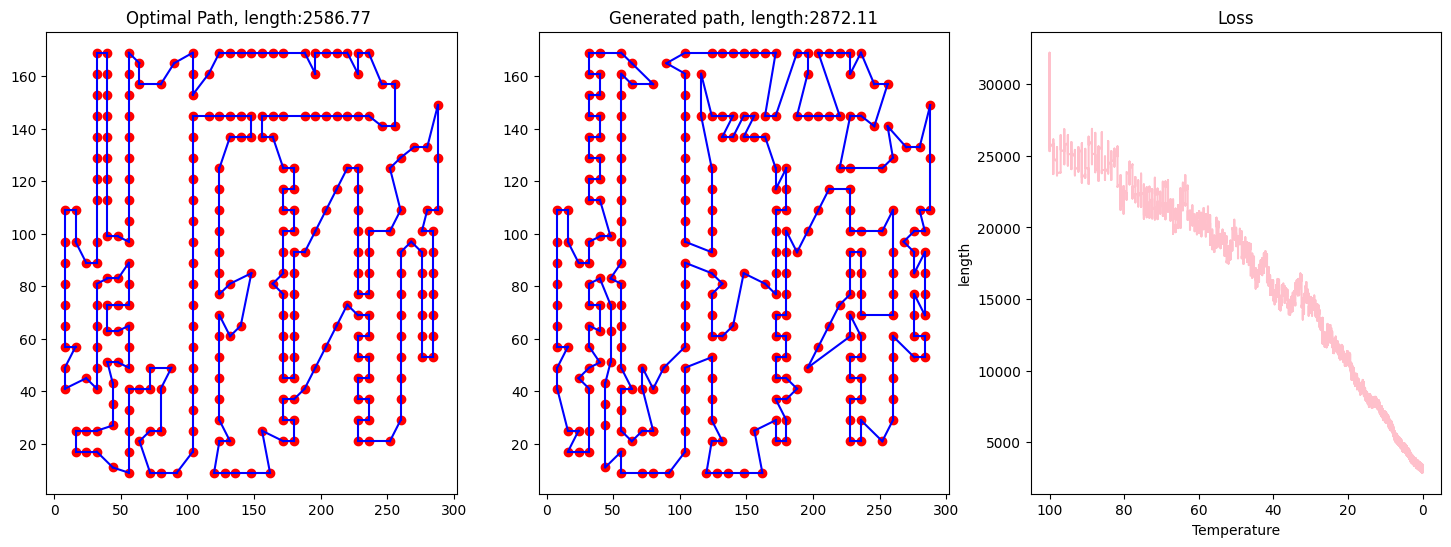

In [8]:


# testing_nodes =  SMALL_NODES
# testing_paths =  SMALL_PATH
# testing_length = SMALL_LENGTH

testing_nodes =  MEDIUM_NODES
testing_paths =  MEDIUM_PATH
testing_length = MEDIUM_LENGTH

# testing_nodes =  LARGE_NODES
# testing_paths =  LARGE_PATH
# testing_length = LARGE_LENGTH


starting = np.random.permutation(range(1,len(testing_nodes)+1))
best, length, iterations, t_list, length_list  = fast_annealing(testing_nodes, 100, .99, 0.01, 600, starting)

fig, axs = plt.subplots(1,3)
fig.set_size_inches(18,6)
plotmap(testing_nodes, axs[0], testing_paths)
axs[0].set_title(f"Optimal Path, length:{testing_length:.2f} ")

plotmap(testing_nodes, axs[1], best)
axs[1].set_title(f"Generated path, length:{length:.2f}")
# axs[2].loglog(t_list, length_list, color='pink')
axs[2].plot(t_list, length_list, color='pink')
axs[2].invert_xaxis()
axs[2].set_xlabel("Temperature")
axs[2].set_ylabel("length")
axs[2].set_title("Loss")
print(f'Best path length found: {length}, provided path length: {testing_length}, found in {iterations} iterations')

In [9]:
print(best)

[143 146 147 142 141 140 266 267 265 264 263 262 259 258 257 256 249 248
 250 251 230 229 210 209 252 255 254 253 208 206 205 204 203 212 207 211
 214 213 216 215 218 217 220 221 222 219 223 224 225 226 227 228 234 235
 236 233 232 231 237 238 239 240 246 245 247 244 241 243 242   2   1 280
   3   4 279 278 260 261 275 276 277   5   6   7   9   8  10  11  12 274
 273 272 271  16  15  13  14  17  18  24  23  25  22  26  27  28  32  33
  31  30 125 124 123 122 121 120 119 152 156 153 155 154 126  29 127 128
  21 129 130  20  19 131 132 133 134 135 270 269 268 136 137 138 139 148
 149 150 179 180 181 176 177 178 151 157 158 159 160 175 174 173 107 106
 172 171 170 169 102 103 104 105 108 110 111 114 115 116 117 118  61  60
  43  42  41  40  39  38  35  34  36  37  50  51  52  49  48  53  54  47
  46  55  56  45  44  57  58  59  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  95  94  96  97  98  93  80  79  81  89  82
  83  88  87  84  85  86 113 112 109  90  91  92  9

In [10]:
# setting up a grid search to find the best parameters for the chain length and cooling rate
# values = np.zeros((20,10))
# best_found = np.ones((20,10)) * np.inf
# for i,temp in enumerate(np.arange(0.8,.991,.01)):
#     for j,chain in enumerate(np.arange(100,1001,100)):
#         print(f"Starting a new run {i}")
#         for _ in range(10):
#         best, length, iterations, t_list, length_list  = sim_annealing(SMALL_NODES, 30, temp, .01, chain, np.random.permutation(range(1, len(SMALL_NODES)+1)))
#         values[i,j] += length/10
#         if length < best_found[i,j]:
#             best_found[i,j] = length
#             best_path = best
#             best_temp = temp
#             best_chain = chain

plt.imshow(values, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()
plt.imshow(best_found, cmap='hot', interpolation='nearest')
plt.title("Minimum found for each parameter set")
plt.colorbar()
plt.show()
print(f"Best path length found: {best_found.min()}, provided path length: {SMALL_LENGTH}")
print(f"Best parameters: temp: {best_temp}, chain: {best_chain}")


NameError: name 'values' is not defined

In [ ]:
print(len(np.arange(0.8,.991,.01)))
print(len(np.arange(100,1001,100)))

20
10


In [ ]:
best_found = best.copy()

In [ ]:

# test_map = Map(SMALL_MAP) 
test_map = Map(MEDIUM_MAP)
# test_map = Map(LARGE_MAP)
best, length, iterations, t_list, length_list  = fast_annealing(test_map, 100, .98, .001, 600, np.random.permutation(list(test_map.nodes.keys())).tolist())

fig, ax = plt.subplots(1,3)
fig.set_size_inches(18,6)
map2.plot(ax[0])
ax[0].set_title(f"Optimal Path, length:{MEDIUM_LENGTH:.2f} ")
test_map.add_paths(best)
test_map.plot(ax[1])
ax[1].set_title(f"Generated path, length:{length:.2f}")
ax[2].plot(t_list, length_list, color='pink')
ax[2].invert_xaxis()
ax[2].set_xscale('log')
ax[2].set_yscale('log')
ax[2].set_xlabel("Temperature")
ax[2].set_ylabel("length")
ax[2].set_title("Loss")
print(f'Best path length found: {length}, optimal length: {MEDIUM_LENGTH}, found in {iterations} iterations')

SystemError: <built-in method __new__ of type object at 0x8615e0> returned a result with an exception set

## Possible Stats
- How rate of finding global minimum as we change each of the parameters

## Investigating different stopping criterea
Current stopping criterea is either based on the temperature or on the number of iterations, but values are arbitraty, lets look for some papers on what else is possible
### [IEEE](https://sci-hub.yncjkj.com/10.1109/iccd.1988.25760)
- Fix number of iterations a-prior
- Lower bound of the probability of doing non optimal thing
- Upper bound on number of identical scores/ configurations
- **Paper Solution** Use stastics gathered during the process.
    - $$T = \sigma_\infty min \left[\frac{\sigma(t)}{t}\right]
- Our problem's solution space is not gaussian, there is a lower bound on the score and there is a "limited" set of states (although growing in O(N!))

    


## Investigating adaptive cooling
Currently we have a  constant cooling rate resulting in exponential cooling. We want to find the fastest cooling rate that still gives reasonably high confidence in converging to a global minimum. 



### What happens when we normalize path lengths?
since these influence the probability directly, maybe normalizing can make the progression more consistent 
> Based on quick testing, does not seem to be different, but this led me to the realization our starting temperature might have been way too high, we wasted a lot of time/computation on high temperatures!

### This shit slooooow, Fast Annealing!

Using the cauchy distribution:
$$\frac{1}{\pi \gamma \left[1+ (\frac{x-x_0}{\gamma} )^2 \right]}$$

$\gamma$ is a scale parameter and $x_0$ is the location, the mean is undefined, and so is the variance.
 
Theory from [Szu and Hartley](https://doi-org.proxy.uba.uva.nl/10.1016/0375-9601(87)90796-1):
> Three parts 
>  1. States get generated with a guassian like peak and Lorentzian wings, which means occassional long jumps but generally local sampling
> 2. The canoncial ensemble for a state acceptance probability allows occaisonal hill-climbing among descents
> 3. An artificial cooling temperature affects both previous ponit to control for paramter noise


## Insights on Simulated annealing

- Because of the way the acceptance threshold gets chosen, we are less likely to accept a path that is substantially worse than one that is only slightly worse


# List based annealing
How do we translate the list into an effective cooling rate?
> Set initial P_accept
> while condition:
> Calculate T based on on P_accept
